In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import utils as np_utils
from keras import layers
from keras import utils
import tensorflow_addons as tfa
from keras.metrics import Precision
from keras.metrics import Recall
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import LSTM
from sklearn.utils import shuffle
import xgboost as xgb

In [2]:
MitM = pd.read_csv("MitM/MitM_dataset.csv", header=None)

In [3]:
MitM

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.000000,1294.000000,0.000000e+00,1.000000,1294.000000,0.000000e+00,1.000000,1294.000000,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1294.000000,0.000000,1294.000000,0.000000e+00,0.0,0.0
1,1.000000,1514.000000,0.000000e+00,1.000000,1514.000000,0.000000e+00,1.000000,1514.000000,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1514.000000,0.000000,1514.000000,0.000000e+00,0.0,0.0
2,1.999505,1294.000000,6.984919e-10,1.999703,1294.000000,2.328306e-10,1.999901,1294.000000,6.984919e-10,1.999990,...,0.000000e+00,0.0,0.0,1.999999,1294.000000,0.000000,1294.000000,0.000000e+00,0.0,0.0
3,2.998985,1294.000000,9.313226e-10,2.999391,1294.000000,4.656613e-10,2.999797,1294.000000,6.984919e-10,2.999980,...,6.984919e-10,0.0,0.0,2.999998,1294.000000,0.000015,1294.000000,2.328306e-10,0.0,0.0
4,3.998061,1294.000000,9.313226e-10,3.998836,1294.000000,2.328306e-10,3.999612,1294.000000,6.984919e-10,3.999961,...,2.328306e-10,0.0,0.0,3.999996,1294.000000,0.000000,1294.000000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504262,380.551133,1331.684771,1.895906e+05,650.148549,1336.357995,1.865743e+05,1973.033776,1339.428666,1.851917e+05,19664.853626,...,1.813631e+05,0.0,0.0,28040.717202,1341.152101,425.618618,1341.152101,1.811512e+05,0.0,0.0
2504263,379.629067,1332.165017,1.891785e+05,649.176314,1336.631637,1.863354e+05,1972.036680,1339.517190,1.851133e+05,19663.862251,...,1.813090e+05,0.0,0.0,28041.433233,1341.158265,425.612280,1341.158265,1.811458e+05,0.0,0.0
2504264,380.276647,1332.643182,1.887678e+05,649.814659,1336.904590,1.860970e+05,1972.670406,1339.605640,1.850348e+05,19664.496996,...,1.812549e+05,0.0,0.0,28042.381146,1341.164429,425.605943,1341.164429,1.811404e+05,0.0,0.0
2504265,379.354717,1333.121248,1.883566e+05,648.842152,1337.177530,1.858584e+05,1971.672375,1339.694090,1.849564e+05,19663.504357,...,1.812009e+05,0.0,0.0,28043.096975,1341.170592,425.599606,1341.170592,1.811350e+05,0.0,0.0


In [4]:
MitM_labels = pd.read_csv("MitM/MitM_labels.csv")

In [5]:
MitM_labels['x'].value_counts()

0    1358995
1    1145272
Name: x, dtype: int64

In [6]:
MitM_labels = MitM_labels.drop(['Unnamed: 0'], axis=1)

In [7]:
MitM_labels

,x
0,0
1,0
2,0
3,0
4,0
...,...
2504262,1
2504263,1
2504264,1
2504265,1


In [9]:
MitM_full = pd.concat([MitM, MitM_labels], axis=1)

In [11]:
MitM_full[:600000].to_csv("MitM_part.csv")

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
MitM_scaled = pd.DataFrame(scaler.fit_transform(MitM))

In [9]:
MitM_scaled

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.000000,0.848693,0.000000e+00,0.000000,0.848693,0.000000e+00,0.000000,0.848693,0.000000e+00,0.000000,...,0.000000e+00,0.954144,0.846794,0.000000,0.848693,0.000000e+00,0.848693,0.000000e+00,0.714064,0.649139
1,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,...,0.000000e+00,0.954144,0.846794,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.714064,0.649139
2,0.001866,0.848693,1.413296e-15,0.001240,0.848693,4.705305e-16,0.000471,0.848693,1.410219e-15,0.000050,...,0.000000e+00,0.954144,0.846794,0.000032,0.848693,0.000000e+00,0.848693,0.000000e+00,0.714064,0.649139
3,0.003732,0.848693,1.884395e-15,0.002480,0.848693,9.410609e-16,0.000942,0.848693,1.410219e-15,0.000101,...,1.640591e-15,0.954144,0.846794,0.000065,0.848693,2.338512e-08,0.848693,5.468637e-16,0.714064,0.649139
4,0.005598,0.848693,1.884395e-15,0.003719,0.848693,4.705305e-16,0.001412,0.848693,1.410219e-15,0.000151,...,5.468637e-16,0.954144,0.846794,0.000097,0.848693,0.000000e+00,0.848693,0.000000e+00,0.714064,0.649139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504262,0.708663,0.874611,3.836088e-01,0.805082,0.877825,3.770503e-01,0.928500,0.879937,3.738924e-01,0.991203,...,4.259788e-01,0.954144,0.846794,0.907094,0.881122,6.522891e-01,0.881122,4.254810e-01,0.714064,0.649139
2504263,0.706941,0.874942,3.827750e-01,0.803876,0.878014,3.765676e-01,0.928030,0.879998,3.737340e-01,0.991153,...,4.258517e-01,0.954144,0.846794,0.907117,0.881127,6.522794e-01,0.881127,4.254684e-01,0.714064,0.649139
2504264,0.708150,0.875270,3.819439e-01,0.804668,0.878201,3.760858e-01,0.928328,0.880059,3.735757e-01,0.991185,...,4.257247e-01,0.954144,0.846794,0.907148,0.881131,6.522696e-01,0.881131,4.254557e-01,0.714064,0.649139
2504265,0.706429,0.875599,3.811120e-01,0.803462,0.878389,3.756037e-01,0.927859,0.880120,3.734173e-01,0.991135,...,4.255977e-01,0.954144,0.846794,0.907171,0.881135,6.522599e-01,0.881135,4.254430e-01,0.714064,0.649139


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

# Chi_square feature selection

In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

In [12]:
fit_feat = bestfeatures.fit(MitM_scaled,MitM_labels)

In [13]:
MitM_scores = pd.DataFrame(fit_feat.scores_)
MitM_columns = pd.DataFrame(MitM_scaled.columns)

In [14]:
featureScores = pd.concat([MitM_columns,MitM_scores],axis=1)
featureScores.columns = ['Specs','Score']

In [15]:
print(featureScores.nlargest(20, 'Score'))

     Specs         Score
58      58  50057.824037
77      77  50057.824037
27      27  49969.049551
108    108  43181.048574
12      12  37499.951751
63      63  29401.928838
51      51   5751.688007
74      74   5751.688007
24      24   5723.137072
56      56   5114.790811
53      53   4722.101536
46      46   4672.799643
60      60   4633.207703
109    109   4563.681203
59      59   4563.208046
28      28   4553.725155
13      13   4553.498041
102    102   4543.808886
45      45   4543.692973
52      52   4543.422668


In [16]:
bestfeatures_list = featureScores.nlargest(20,'Score')['Specs']

In [17]:
bestfeatures_list = bestfeatures_list.tolist()

In [18]:
bestfeatures_list

[58,
 77,
 27,
 108,
 12,
 63,
 51,
 74,
 24,
 56,
 53,
 46,
 60,
 109,
 59,
 28,
 13,
 102,
 45,
 52]

In [19]:
MitM_labels['label_name'] = np.where(MitM_labels['x']==0, 'not attack', 'attack')

In [20]:
MitM_labels

,x,label_name
0,0,not attack
1,0,not attack
2,0,not attack
3,0,not attack
4,0,not attack
...,...,...
2504262,1,attack
2504263,1,attack
2504264,1,attack
2504265,1,attack


In [21]:
MitM_full = pd.concat([MitM_scaled, MitM_labels], axis=1)

In [22]:
MitM_full = shuffle(MitM_full)

In [23]:
MitM_full

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,x,label_name
600657,0.963757,0.894369,0.332001,0.967888,0.889382,0.344755,0.982542,0.882877,0.360906,0.997761,...,0.846794,0.786844,0.880941,0.652408,0.880941,0.425637,0.714064,0.649139,0,not attack
1259355,0.688839,0.870384,0.393599,0.789673,0.875251,0.379649,0.921436,0.879609,0.367441,0.990089,...,0.846794,0.893562,0.881603,0.650357,0.881603,0.422964,0.714064,0.649139,0,not attack
917499,0.946148,0.902544,0.307675,0.952649,0.894738,0.330606,0.975385,0.884978,0.355147,0.995490,...,0.846794,0.866339,0.880832,0.652581,0.880832,0.425862,0.714064,0.649139,0,not attack
416743,0.319981,0.853367,0.282743,0.364577,0.852206,0.285520,0.414839,0.850540,0.287684,0.440268,...,0.846794,0.751696,0.803135,0.363151,0.804142,0.131878,0.714064,0.649139,0,not attack
183210,0.650298,0.878840,0.361516,0.753871,0.879291,0.362906,0.905538,0.876836,0.376834,0.988259,...,0.846794,0.416568,0.880759,0.653204,0.880759,0.426675,0.714064,0.649139,0,not attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884608,0.872626,0.895693,0.342779,0.897113,0.886513,0.365705,0.945378,0.879630,0.378133,0.911782,...,0.846794,0.905747,0.881234,0.651664,0.881234,0.424666,0.714064,0.649139,1,attack
384812,0.652593,0.860742,0.417215,0.746348,0.866313,0.404921,0.896427,0.874146,0.386297,0.988212,...,0.846794,0.658060,0.880624,0.653487,0.880624,0.427045,0.714064,0.649139,0,not attack
1606405,0.672268,0.873601,0.372410,0.767159,0.877473,0.364733,0.905668,0.880841,0.360191,0.965465,...,0.846794,0.902666,0.881425,0.650835,0.881425,0.423586,0.714064,0.649139,1,attack
1729054,0.431177,0.862469,0.236238,0.421809,0.858203,0.250809,0.426774,0.854578,0.264819,0.440975,...,0.846794,0.908695,0.877171,0.652910,0.877171,0.426291,0.714064,0.649139,1,attack


In [24]:
%matplotlib inline

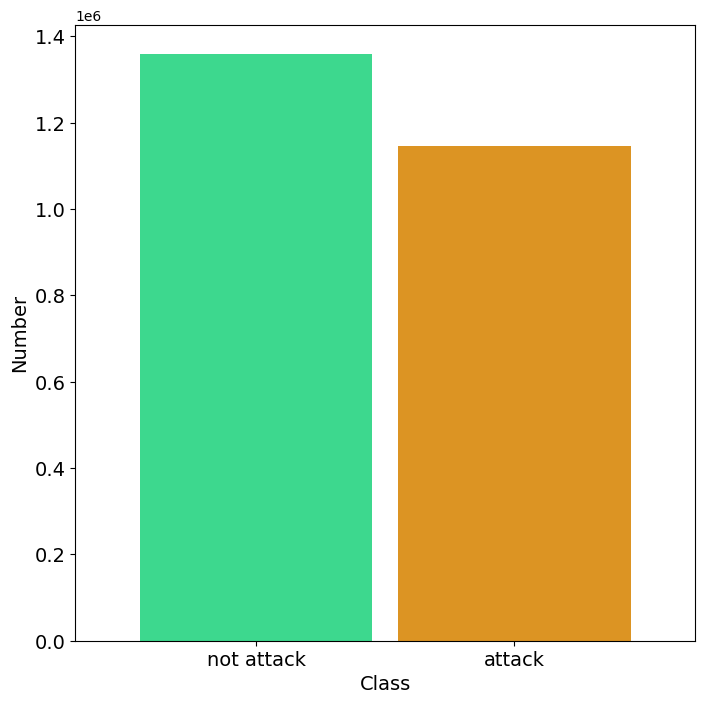

In [25]:
plt.figure(figsize=[8,8])
MitM_full.label_name.value_counts().plot(kind='bar', width=0.9, color=['#3DD88E','#DC9423'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [26]:
X = MitM_full[bestfeatures_list]
y = MitM_full['x']

In [27]:
X

,58,77,27,108,12,63,51,74,24,56,53,46,60,109,59,28,13,102,45,52
600657,0.866662,0.866662,0.866622,0.786844,0.872844,0.499348,0.997434,0.997434,0.997404,0.518520,0.949960,0.921435,0.947864,0.880941,0.879976,0.879950,0.879950,0.880129,0.882878,0.879297
1259355,0.984247,0.984247,0.984183,0.893562,0.991249,0.068198,0.989784,0.989784,0.989734,0.152502,0.942423,0.929743,0.944954,0.881603,0.880624,0.880612,0.880612,0.881768,0.879609,0.880684
917499,0.954027,0.954027,0.953968,0.866339,0.960817,0.401706,0.995189,0.995189,0.995134,0.378347,0.942781,0.914057,0.948127,0.880832,0.879858,0.879844,0.879844,0.881422,0.884978,0.880406
416743,0.334038,0.334038,0.334022,0.751696,0.336420,0.469339,0.440136,0.440136,0.440111,0.423255,0.832891,0.822672,0.831958,0.803135,0.850210,0.850190,0.850190,0.802702,0.850540,0.849710
183210,0.458714,0.458714,0.458682,0.416568,0.461975,0.436980,0.987956,0.987956,0.987906,0.438209,0.953168,0.941551,0.948990,0.880759,0.879798,0.879790,0.879790,0.879400,0.876836,0.878573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884608,0.997663,0.997663,0.997659,0.905747,0.968925,0.587690,0.992748,0.992748,0.992747,0.435903,0.948236,0.943156,0.946757,0.881234,0.880270,0.880205,0.880368,0.880944,0.879607,0.879969
384812,0.724356,0.724356,0.724335,0.658060,0.729535,0.474602,0.987843,0.987843,0.987859,0.404798,0.951031,0.953299,0.949380,0.880624,0.879653,0.879617,0.879617,0.879672,0.874146,0.878777
1606405,0.994303,0.994303,0.994297,0.902666,0.962763,0.698865,0.987251,0.987251,0.987296,0.463370,0.940915,0.920525,0.945686,0.881425,0.880437,0.880374,0.880489,0.882124,0.880841,0.881124
1729054,0.442589,0.442589,0.442559,0.908695,0.445737,0.469280,0.440843,0.440843,0.440817,0.422815,0.824107,0.789303,0.831351,0.877171,0.850455,0.850446,0.850446,0.878305,0.854578,0.851399


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
y_train

373121     0
1212116    0
1755750    1
332839     0
2149467    1
          ..
959488     0
1081799    0
1630806    1
385119     0
2356898    1
Name: x, Length: 1752986, dtype: int64

In [30]:
matrix_labels = ['attack','not attack']

In [31]:
algorithms = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost']

In [37]:
metrics_list = []

In [38]:
classifiers = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None), 
RandomForestClassifier(n_estimators = 10), xgb.XGBClassifier(random_state=42), CatBoostClassifier(task_type="GPU", devices='0:1')]

In [39]:
k = 0
for i in classifiers:
    i.fit(x_train, y_train)        
    y_pred = i.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    metrics_list.append({'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F1-score': f1,
                        'fpr': fpr,
                        'tpr': tpr})
        
    print("Evaluation metrics of " + algorithms[k]+" algorithm: ")
    print('Accuracy: ', accuracy)  
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1-score: ', f1)
    
    k = k + 1                

Evaluation metrics of Naive Bayes algorithm: 
Accuracy:  0.6810314649245754
Precision:  0.999951980792317
Recall:  0.30289454545454547
F1-score:  0.4649511582472788


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation metrics of Logistic Regression algorithm: 
Accuracy:  0.9835960180012538
Precision:  0.970153149523642
Recall:  0.994752
F1-score:  0.982298596987142
Evaluation metrics of Decision tree algorithm: 
Accuracy:  0.999949419724444
Precision:  0.9999709075675235
Recall:  0.9999185454545455
F1-score:  0.9999447258255489
Evaluation metrics of Random Forest algorithm: 
Accuracy:  0.9999893515209356
Precision:  0.9999941817504786
Recall:  0.9999825454545455
F1-score:  0.9999883635686608
Evaluation metrics of XGBoost algorithm: 
Accuracy:  0.9999880204610525
Precision:  0.99999709084985
Recall:  0.9999767272727272
F1-score:  0.9999869089576184
Learning rate set to 0.022355
0:	learn: 0.5909455	total: 28.6ms	remaining: 28.6s
1:	learn: 0.5021683	total: 44.4ms	remaining: 22.2s
2:	learn: 0.4254638	total: 59.9ms	remaining: 19.9s
3:	learn: 0.3621953	total: 75.3ms	remaining: 18.7s
4:	learn: 0.3038330	total: 91.2ms	remaining: 18.1s
5:	learn: 0.2566898	total: 107ms	remaining: 17.7s
6:	learn: 0.

152:	learn: 0.0013742	total: 2.37s	remaining: 13.1s
153:	learn: 0.0013734	total: 2.39s	remaining: 13.1s
154:	learn: 0.0013724	total: 2.4s	remaining: 13.1s
155:	learn: 0.0013510	total: 2.42s	remaining: 13.1s
156:	learn: 0.0013501	total: 2.44s	remaining: 13.1s
157:	learn: 0.0013152	total: 2.45s	remaining: 13.1s
158:	learn: 0.0012980	total: 2.47s	remaining: 13.1s
159:	learn: 0.0012703	total: 2.48s	remaining: 13s
160:	learn: 0.0012424	total: 2.5s	remaining: 13s
161:	learn: 0.0012174	total: 2.52s	remaining: 13s
162:	learn: 0.0012168	total: 2.53s	remaining: 13s
163:	learn: 0.0012160	total: 2.54s	remaining: 13s
164:	learn: 0.0011960	total: 2.56s	remaining: 13s
165:	learn: 0.0011728	total: 2.58s	remaining: 13s
166:	learn: 0.0011547	total: 2.6s	remaining: 12.9s
167:	learn: 0.0011409	total: 2.61s	remaining: 12.9s
168:	learn: 0.0011250	total: 2.63s	remaining: 12.9s
169:	learn: 0.0011221	total: 2.64s	remaining: 12.9s
170:	learn: 0.0011215	total: 2.66s	remaining: 12.9s
171:	learn: 0.0011030	total: 

311:	learn: 0.0004962	total: 4.89s	remaining: 10.8s
312:	learn: 0.0004953	total: 4.91s	remaining: 10.8s
313:	learn: 0.0004913	total: 4.93s	remaining: 10.8s
314:	learn: 0.0004846	total: 4.94s	remaining: 10.7s
315:	learn: 0.0004811	total: 4.96s	remaining: 10.7s
316:	learn: 0.0004760	total: 4.97s	remaining: 10.7s
317:	learn: 0.0004754	total: 4.99s	remaining: 10.7s
318:	learn: 0.0004734	total: 5s	remaining: 10.7s
319:	learn: 0.0004721	total: 5.02s	remaining: 10.7s
320:	learn: 0.0004716	total: 5.03s	remaining: 10.6s
321:	learn: 0.0004660	total: 5.05s	remaining: 10.6s
322:	learn: 0.0004612	total: 5.06s	remaining: 10.6s
323:	learn: 0.0004601	total: 5.08s	remaining: 10.6s
324:	learn: 0.0004597	total: 5.09s	remaining: 10.6s
325:	learn: 0.0004563	total: 5.11s	remaining: 10.6s
326:	learn: 0.0004550	total: 5.12s	remaining: 10.5s
327:	learn: 0.0004543	total: 5.14s	remaining: 10.5s
328:	learn: 0.0004517	total: 5.15s	remaining: 10.5s
329:	learn: 0.0004489	total: 5.17s	remaining: 10.5s
330:	learn: 0.0

471:	learn: 0.0002500	total: 7.34s	remaining: 8.21s
472:	learn: 0.0002498	total: 7.36s	remaining: 8.2s
473:	learn: 0.0002481	total: 7.37s	remaining: 8.18s
474:	learn: 0.0002472	total: 7.38s	remaining: 8.16s
475:	learn: 0.0002467	total: 7.4s	remaining: 8.14s
476:	learn: 0.0002455	total: 7.41s	remaining: 8.13s
477:	learn: 0.0002443	total: 7.43s	remaining: 8.11s
478:	learn: 0.0002441	total: 7.44s	remaining: 8.1s
479:	learn: 0.0002432	total: 7.46s	remaining: 8.08s
480:	learn: 0.0002423	total: 7.47s	remaining: 8.07s
481:	learn: 0.0002416	total: 7.49s	remaining: 8.05s
482:	learn: 0.0002409	total: 7.51s	remaining: 8.04s
483:	learn: 0.0002408	total: 7.52s	remaining: 8.02s
484:	learn: 0.0002393	total: 7.54s	remaining: 8s
485:	learn: 0.0002392	total: 7.55s	remaining: 7.99s
486:	learn: 0.0002390	total: 7.57s	remaining: 7.97s
487:	learn: 0.0002380	total: 7.58s	remaining: 7.96s
488:	learn: 0.0002363	total: 7.6s	remaining: 7.94s
489:	learn: 0.0002354	total: 7.62s	remaining: 7.93s
490:	learn: 0.00023

636:	learn: 0.0001751	total: 9.89s	remaining: 5.64s
637:	learn: 0.0001751	total: 9.91s	remaining: 5.62s
638:	learn: 0.0001745	total: 9.92s	remaining: 5.61s
639:	learn: 0.0001745	total: 9.94s	remaining: 5.59s
640:	learn: 0.0001742	total: 9.95s	remaining: 5.57s
641:	learn: 0.0001742	total: 9.97s	remaining: 5.56s
642:	learn: 0.0001741	total: 9.98s	remaining: 5.54s
643:	learn: 0.0001739	total: 10s	remaining: 5.53s
644:	learn: 0.0001738	total: 10s	remaining: 5.51s
645:	learn: 0.0001734	total: 10s	remaining: 5.5s
646:	learn: 0.0001733	total: 10s	remaining: 5.48s
647:	learn: 0.0001722	total: 10.1s	remaining: 5.46s
648:	learn: 0.0001721	total: 10.1s	remaining: 5.45s
649:	learn: 0.0001715	total: 10.1s	remaining: 5.43s
650:	learn: 0.0001712	total: 10.1s	remaining: 5.42s
651:	learn: 0.0001706	total: 10.1s	remaining: 5.4s
652:	learn: 0.0001703	total: 10.1s	remaining: 5.38s
653:	learn: 0.0001703	total: 10.1s	remaining: 5.37s
654:	learn: 0.0001703	total: 10.2s	remaining: 5.35s
655:	learn: 0.0001696	

798:	learn: 0.0001451	total: 12.7s	remaining: 3.2s
799:	learn: 0.0001451	total: 12.7s	remaining: 3.18s
800:	learn: 0.0001451	total: 12.7s	remaining: 3.17s
801:	learn: 0.0001446	total: 12.8s	remaining: 3.15s
802:	learn: 0.0001445	total: 12.8s	remaining: 3.13s
803:	learn: 0.0001444	total: 12.8s	remaining: 3.12s
804:	learn: 0.0001444	total: 12.8s	remaining: 3.1s
805:	learn: 0.0001444	total: 12.8s	remaining: 3.08s
806:	learn: 0.0001442	total: 12.8s	remaining: 3.07s
807:	learn: 0.0001442	total: 12.9s	remaining: 3.05s
808:	learn: 0.0001439	total: 12.9s	remaining: 3.04s
809:	learn: 0.0001433	total: 12.9s	remaining: 3.02s
810:	learn: 0.0001433	total: 12.9s	remaining: 3.01s
811:	learn: 0.0001431	total: 12.9s	remaining: 2.99s
812:	learn: 0.0001424	total: 12.9s	remaining: 2.97s
813:	learn: 0.0001423	total: 12.9s	remaining: 2.96s
814:	learn: 0.0001422	total: 13s	remaining: 2.94s
815:	learn: 0.0001421	total: 13s	remaining: 2.93s
816:	learn: 0.0001417	total: 13s	remaining: 2.91s
817:	learn: 0.000141

967:	learn: 0.0001283	total: 15.5s	remaining: 512ms
968:	learn: 0.0001283	total: 15.5s	remaining: 496ms
969:	learn: 0.0001283	total: 15.5s	remaining: 480ms
970:	learn: 0.0001282	total: 15.5s	remaining: 464ms
971:	learn: 0.0001281	total: 15.5s	remaining: 448ms
972:	learn: 0.0001279	total: 15.6s	remaining: 432ms
973:	learn: 0.0001279	total: 15.6s	remaining: 416ms
974:	learn: 0.0001278	total: 15.6s	remaining: 400ms
975:	learn: 0.0001278	total: 15.6s	remaining: 384ms
976:	learn: 0.0001278	total: 15.6s	remaining: 368ms
977:	learn: 0.0001278	total: 15.7s	remaining: 352ms
978:	learn: 0.0001275	total: 15.7s	remaining: 336ms
979:	learn: 0.0001275	total: 15.7s	remaining: 320ms
980:	learn: 0.0001275	total: 15.7s	remaining: 304ms
981:	learn: 0.0001275	total: 15.7s	remaining: 288ms
982:	learn: 0.0001275	total: 15.7s	remaining: 272ms
983:	learn: 0.0001275	total: 15.8s	remaining: 256ms
984:	learn: 0.0001274	total: 15.8s	remaining: 240ms
985:	learn: 0.0001274	total: 15.8s	remaining: 224ms
986:	learn: 

In [40]:
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=20))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(1))
model_dnn.add(Activation('sigmoid'))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), 
                                                                         Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [41]:
history_dnn = model_dnn.fit(x_train, y_train, batch_size = 128, epochs = 6, verbose=1, validation_split=0.1)

Epoch 1/6
12326/12326 [==============================] - 112s 9ms/step - loss: 0.1024 - accuracy: 0.9598 - precision: 0.9422 - recall: 0.9718 - fbeta_score: 0.8721 - val_loss: 0.0477 - val_accuracy: 0.9805 - val_precision: 0.9627 - val_recall: 0.9958 - val_fbeta_score: 0.9795
Epoch 2/6
12326/12326 [==============================] - 102s 8ms/step - loss: 0.0841 - accuracy: 0.9708 - precision: 0.9542 - recall: 0.9834 - fbeta_score: 0.8986 - val_loss: 0.0537 - val_accuracy: 0.9845 - val_precision: 0.9783 - val_recall: 0.9878 - val_fbeta_score: 0.8965
Epoch 3/6
12326/12326 [==============================] - 101s 8ms/step - loss: 0.0859 - accuracy: 0.9705 - precision: 0.9527 - recall: 0.9843 - fbeta_score: 0.8925 - val_loss: 0.0497 - val_accuracy: 0.9841 - val_precision: 0.9737 - val_recall: 0.9920 - val_fbeta_score: 0.8081
Epoch 4/6
12326/12326 [==============================] - 101s 8ms/step - loss: 0.0837 - accuracy: 0.9710 - precision: 0.9533 - recall: 0.9848 - fbeta_score: 0.8941 - val

In [42]:
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_dnn))
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_dnn))

Training Accuracy: 0.9839
Testing Accuracy: 0.9837


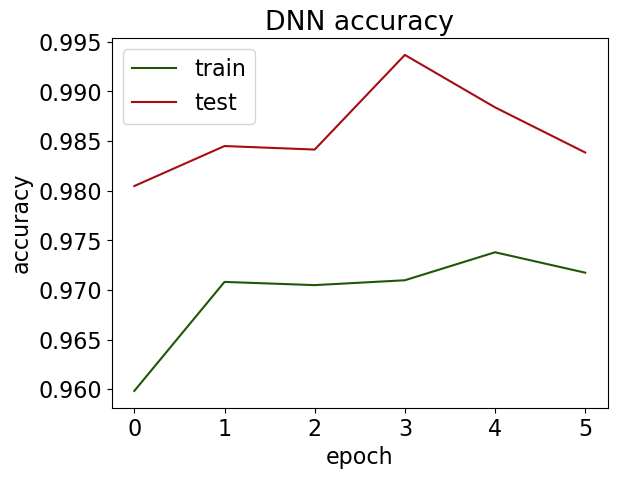

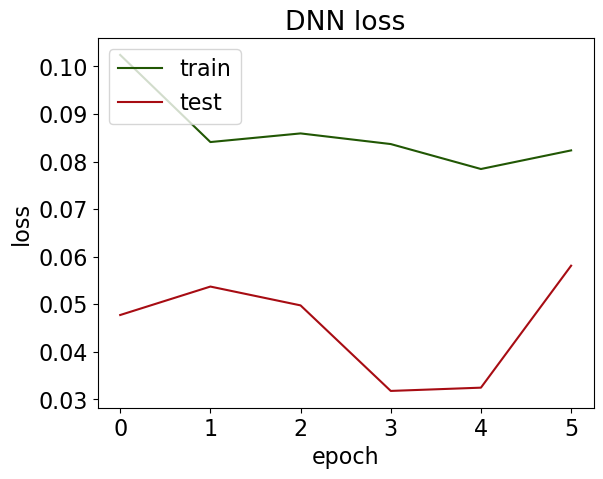

In [43]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_dnn.history['accuracy'], color='#215704')
plt.plot(history_dnn.history['val_accuracy'], color='#A70C13')
plt.title('DNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_dnn.history['loss'], color='#215704')
plt.plot(history_dnn.history['val_loss'], color='#A70C13')
plt.title('DNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
y_pred = model_dnn.predict(x_test)

23478/23478 [==============================] - 34s 1ms/step


In [45]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [47]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.9836945164325998
Precision - 0.9710573283163004
Recall - 0.9939898181818182
F1-score - 0.9823897598969549


In [48]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [49]:
metrics_list.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1,
                    'fpr': fpr,
                    'tpr': tpr})

In [50]:
metrics_list

[{'Accuracy': 0.6810314649245754,
  'Precision': 0.999951980792317,
  'Recall': 0.30289454545454547,
  'F1-score': 0.4649511582472788,
  'fpr': array([0.00000000e+00, 1.22690053e-05, 1.00000000e+00]),
  'tpr': array([0.        , 0.30289455, 1.        ])},
 {'Accuracy': 0.9835960180012538,
  'Precision': 0.970153149523642,
  'Recall': 0.994752,
  'F1-score': 0.982298596987142,
  'fpr': array([0.        , 0.02581399, 1.        ]),
  'tpr': array([0.      , 0.994752, 1.      ])},
 {'Accuracy': 0.999949419724444,
  'Precision': 0.9999709075675235,
  'Recall': 0.9999185454545455,
  'F1-score': 0.9999447258255489,
  'fpr': array([0.00000000e+00, 2.45380106e-05, 1.00000000e+00]),
  'tpr': array([0.        , 0.99991855, 1.        ])},
 {'Accuracy': 0.9999893515209356,
  'Precision': 0.9999941817504786,
  'Recall': 0.9999825454545455,
  'F1-score': 0.9999883635686608,
  'fpr': array([0.00000000e+00, 4.90760212e-06, 1.00000000e+00]),
  'tpr': array([0.        , 0.99998255, 1.        ])},
 {'Accu

In [51]:
ML_DNN_models = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost','DNN']

In [52]:
data_bar = pd.DataFrame(metrics_list, index=ML_DNN_models)

In [53]:
data_fpr_tpr = pd.DataFrame(metrics_list, index=ML_DNN_models)
data_fpr_tpr.drop(['Accuracy','Precision','Recall','F1-score'], axis=1, inplace=True)

In [54]:
data_bar.drop(['fpr','tpr'], axis=1, inplace=True)

In [55]:
tpr_list = data_fpr_tpr['tpr'].to_list()
fpr_list = data_fpr_tpr['fpr'].to_list()

In [56]:
auc_roc_list = []

In [57]:
for i in range(len(tpr_list)):
    auc_roc_list.append(metrics.auc(fpr_list[i], tpr_list[i]))

In [58]:
clrs2 = ['green',  'yellow', 'orange', 'red', 'blue', 'cyan', 'brown']

In [59]:
bar_plot_data = pd.DataFrame({
    "Accuracy": data_bar["Accuracy"].values,
    "Precision": data_bar["Precision"].values,
    "Recall": data_bar["Recall"].values,
    "F1-score": data_bar["F1-score"].values
    },
    index=["Naive Bayes","Logistic Regression","Decision tree","Random Forest","XGBoost","CatBoost","DNN"]
)

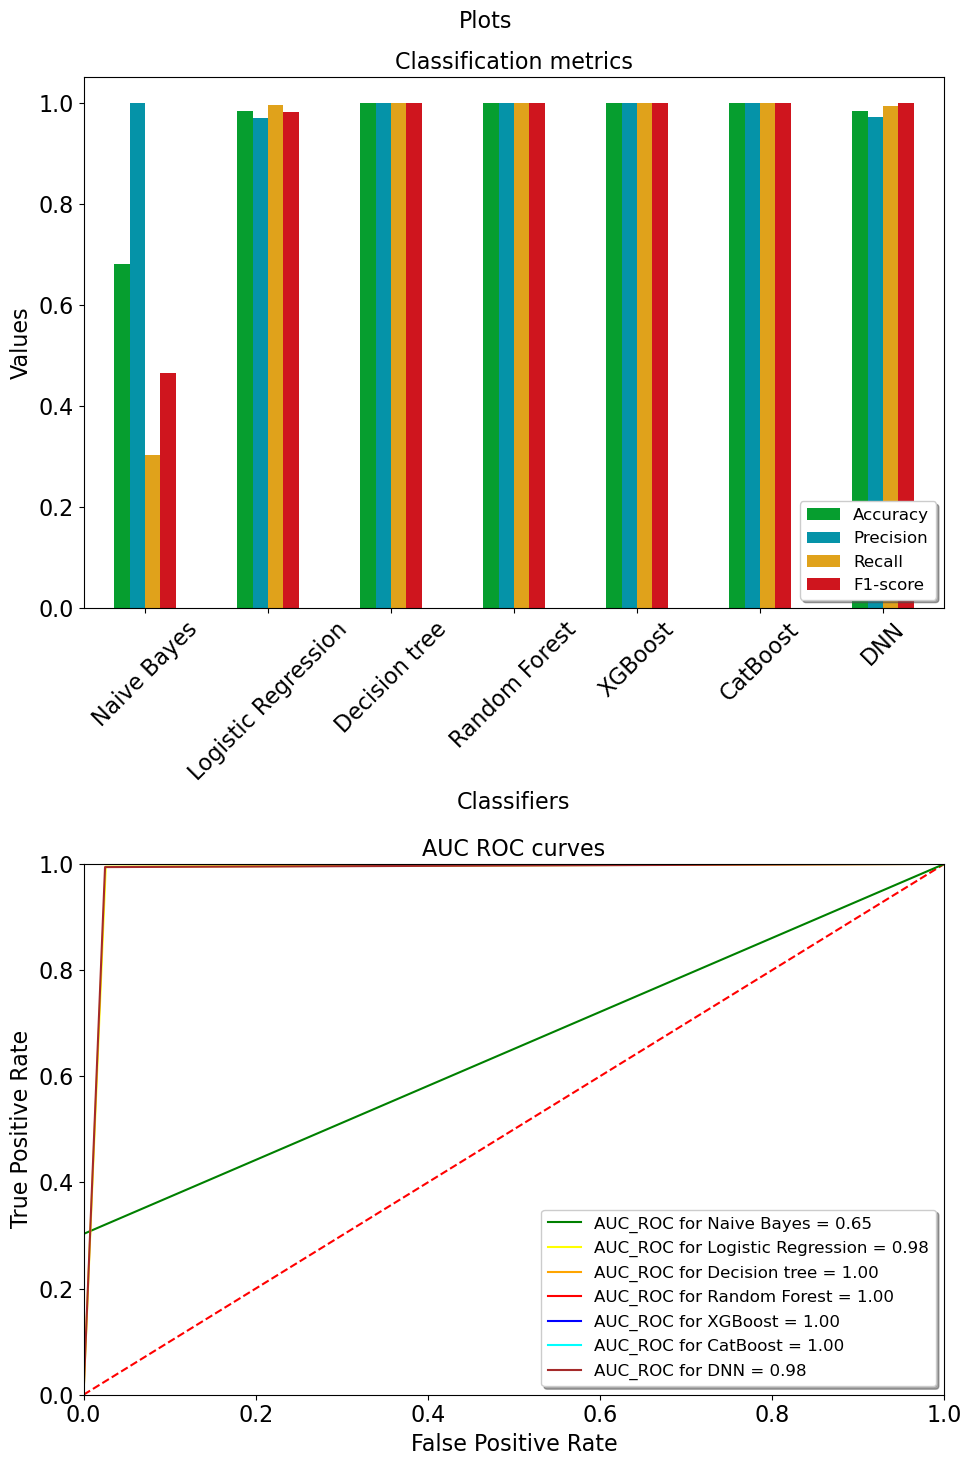

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))
fig.suptitle('Plots', fontsize = 16)
axes[0].set_title('Classification metrics', fontsize = 16)
clrs = ['#069e2f',  '#0593a8', '#e0a21b', '#cf151e']
data_bar.plot(kind="bar", ax=axes[0], color=clrs, rot=45)
axes[0].set_xlabel('Classifiers', fontsize = 16)
axes[0].set_ylabel('Values', fontsize = 16)
axes[0].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)

axes[1].set_title('AUC ROC curves', fontsize = 16)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('True Positive Rate', fontsize = 16)
axes[1].set_xlabel('False Positive Rate', fontsize = 16)
for i in range(len(auc_roc_list)):
    axes[1].plot(fpr_list[i], tpr_list[i], clrs2[i], label = 'AUC_ROC for ' + ML_DNN_models[i] + ' = %0.2f' % auc_roc_list[i])

axes[1].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)
fig.tight_layout()
plt.show()